In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from data_loader import load_csv

In [3]:
# Path handling
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
csv_path = os.path.join(project_root,"data/dataset_G21.csv")

In [ ]:
# Parameters
start_date = "2020-01-01"
end_date = "2025-12-31"

## 1. Loading Data

In [5]:
# Reload data (if you add tickers in config for example)
if os.path.exists(csv_path):
    try:
        os.remove(csv_path)
    except PermissionError:
        print("Unable to delete old csv (you probably have it opened somewhere)")
        raise

load_csv(start_date=start_date, end_date=end_date, write=True)

[*********************100%***********************]  28 of 28 completed


Price      Adj Close                                                     \
Ticker          AGRO       ALCO     BRL=X        CAG    CC=F         CF   
Date                                                                      
2020-01-01       NaN        NaN  4.016786        NaN     NaN        NaN   
2020-01-02  7.232737  31.624662  4.016300  25.650572  2532.0  39.837769   
2020-01-03  7.375079  31.466589  4.023400  25.429379  2519.0  39.563030   
2020-01-06  7.428456  31.501713  4.057000  25.566666  2484.0  39.494350   
2020-01-07  7.464043  31.589542  4.060400  24.651394  2533.0  39.133728   
...              ...        ...       ...        ...     ...        ...   
2025-12-23  7.950000  36.369946  5.590000  16.651476  5958.0  77.725067   
2025-12-24  7.940000  35.960506  5.518500  16.749540  5966.0  77.158096   
2025-12-26  7.990000  36.559685  5.519500  16.906445  5953.0  77.038727   
2025-12-29  8.050000  36.809341  5.542500  17.122189  6242.0  77.237671   
2025-12-30  7.920000  36.469810  5.569100  17.092770  6063.0  76.521492   

Price                                                  ...    Volume  \
Ticker            DBA  EURUSD=X        FDP       FIZZ  ...       MOO   
Date                                                   ...             
2020-01-01        NaN  1.122083        NaN        NaN  ...       NaN   
2020-01-02  14.560221  1.122083  29.602840  20.063208  ...   34200.0   
2020-01-03  14.392557  1.117144  29.731848  19.885693  ...   16000.0   
2020-01-06  14.427855  1.116196  29.465235  19.947617  ...  130100.0   
2020-01-07  14.463151  1.119799  29.181421  19.163250  ...   11600.0   
...               ...       ...        ...        ...  ...       ...   
2025-12-23  25.480000  1.176595  35.889999  31.850000  ...   77300.0   
2025-12-24  25.650000  1.179551  35.970001  32.250000  ...   33600.0   
2025-12-26  25.660000  1.178536  35.860001  32.320000  ...   50400.0   
2025-12-29  25.650000  1.177274  35.779999  32.189999  ...   75500.0   
2025-12-30  25.570000  1.177288  35.480000  32.189999  ...   58000.0   

Price                                                                   \
Ticker            MOS     NSRGY        NTR   OJ=F        PEP      SB=F   
Date                                                                     
2020-01-01        NaN       NaN        NaN    NaN        NaN       NaN   
2020-01-02  4173100.0  570500.0  1004700.0  217.0  3784100.0   84015.0   
2020-01-03  4112400.0  470400.0   925800.0    0.0  4000100.0   63589.0   
2020-01-06  4134100.0  260700.0  1559400.0   34.0  4085100.0  101231.0   
2020-01-07  4618900.0  561300.0  1183500.0    2.0  5718100.0   67177.0   
...               ...       ...        ...    ...        ...       ...   
2025-12-23  4728700.0  524600.0  2237100.0  439.0  7254800.0   56331.0   
2025-12-24  1619300.0  118600.0  1192600.0  191.0  2618700.0       0.0   
2025-12-26  3919300.0  154200.0  1557700.0  245.0  4975500.0   24319.0   
2025-12-29  5222700.0  310200.0  1532900.0  232.0  7201900.0   40085.0   
2025-12-30  4049900.0  333000.0  2344700.0   29.0  4713800.0   63491.0   

Price                                      
Ticker            SJM    TATYY        TSN  
Date                                       
2020-01-01        NaN      NaN        NaN  
2020-01-02   713100.0    514.0  2672200.0  
2020-01-03   666400.0    343.0  2506100.0  
2020-01-06  1112300.0   1543.0  2262500.0  
2020-01-07   791800.0      0.0  2088700.0  
...               ...      ...        ...  
2025-12-23  1927000.0  12800.0  1769900.0  
2025-12-24   579000.0      0.0   623400.0  
2025-12-26   961200.0    300.0  1086200.0  
2025-12-29  1422800.0   1100.0  1704100.0  
2025-12-30  1160200.0   2900.0  2597700.0  

[1562 rows x 168 columns]

In [ ]:
# Reading data
if not os.path.exists(csv_path):
    load_csv() # By default, 2020-01-01 to 2025-12-31

df = pd.read_csv(csv_path, header=[0, 1], index_col=0)
df.index = pd.to_datetime(df.index)

df.head()

Price      Adj Close                                                     \
Ticker          AGRO       ALCO     BRL=X        CAG    CC=F         CF   
Date                                                                      
2020-01-01       NaN        NaN  4.016786        NaN     NaN        NaN   
2020-01-02  7.232737  31.624662  4.016300  25.650572  2532.0  39.837769   
2020-01-03  7.375079  31.466589  4.023400  25.429379  2519.0  39.563030   
2020-01-06  7.428456  31.501713  4.057000  25.566666  2484.0  39.494350   
2020-01-07  7.464043  31.589542  4.060400  24.651394  2533.0  39.133728   

Price                                                  ...    Volume  \
Ticker            DBA  EURUSD=X        FDP       FIZZ  ...       MOO   
Date                                                   ...             
2020-01-01        NaN  1.122083        NaN        NaN  ...       NaN   
2020-01-02  14.560221  1.122083  29.602840  20.063208  ...   34200.0   
2020-01-03  14.392557  1.117144  29.731848  19.885693  ...   16000.0   
2020-01-06  14.427855  1.116196  29.465235  19.947617  ...  130100.0   
2020-01-07  14.463151  1.119799  29.181421  19.163250  ...   11600.0   

Price                                                                   \
Ticker            MOS     NSRGY        NTR   OJ=F        PEP      SB=F   
Date                                                                     
2020-01-01        NaN       NaN        NaN    NaN        NaN       NaN   
2020-01-02  4173100.0  570500.0  1004700.0  217.0  3784100.0   84015.0   
2020-01-03  4112400.0  470400.0   925800.0    0.0  4000100.0   63589.0   
2020-01-06  4134100.0  260700.0  1559400.0   34.0  4085100.0  101231.0   
2020-01-07  4618900.0  561300.0  1183500.0    2.0  5718100.0   67177.0   

Price                                     
Ticker            SJM   TATYY        TSN  
Date                                      
2020-01-01        NaN     NaN        NaN  
2020-01-02   713100.0   514.0  2672200.0  
2020-01-03   666400.0   343.0  2506100.0  
2020-01-06  1112300.0  1543.0  2262500.0  
2020-01-07   791800.0     0.0  2088700.0  

[5 rows x 168 columns]

## 2.1 Testing Correlation

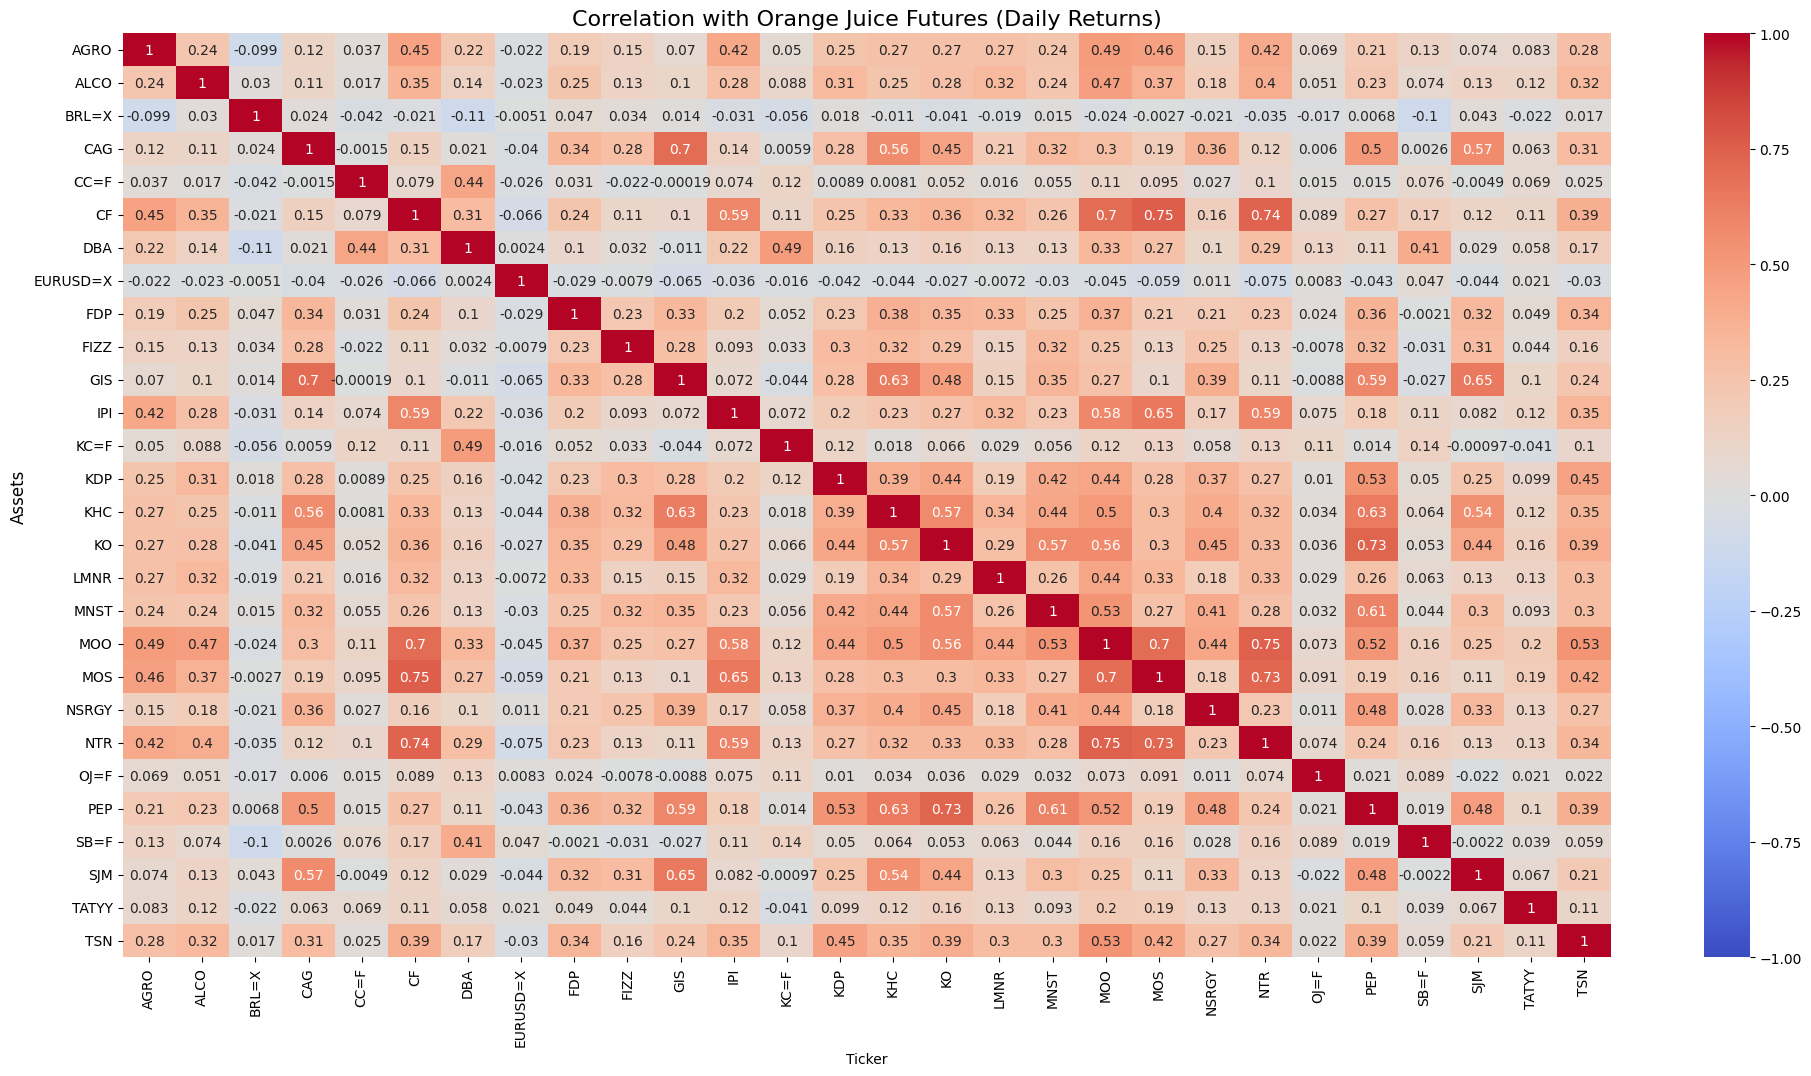

In [7]:
# Returns and Correlation
log_prices = np.log(df['Adj Close'].dropna())

returns = log_prices.pct_change().dropna()
corr_matrix = returns.corr()

plt.figure(figsize=(24, 12))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title('Correlation with Orange Juice Futures (Daily Returns)', fontsize=16)
plt.ylabel('Assets', fontsize=12)
plt.show()

## 2.2 Testing Cointegration

In [8]:
import statsmodels.tsa.stattools as ts

C:\Users\Secours\AppData\Local\Temp\ipykernel_11756\1335543639.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='P-Value', y='Ticker', data=results_df, palette="coolwarm")


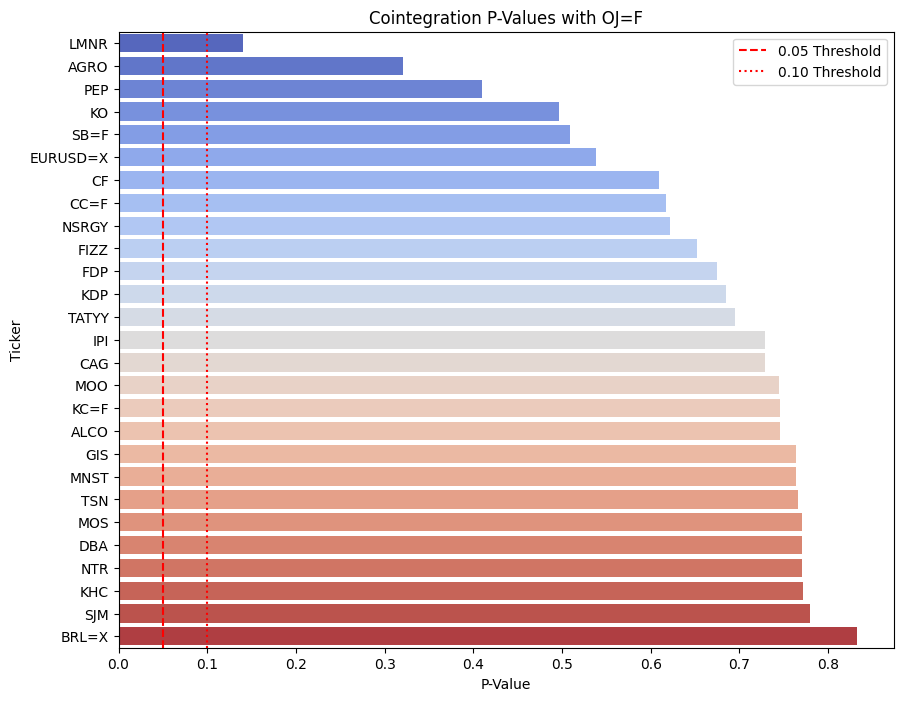

,Ticker,P-Value,T-Stat,Significant (5%),Significant (10%)
16,LMNR,0.140102,-2.885103,False,False
0,AGRO,0.321087,-2.407976,False,False
22,PEP,0.410040,-2.227873,False,False
15,KO,0.496669,-2.061175,False,False
23,SB=F,0.508676,-2.038193,False,False


In [10]:
anchor_ticker = 'OJ=F'

def coint_test(df):
    """
    Runs Engle-Granger cointegration test against the anchor ticker.
    Returns a DataFrame of results sorted by P-Value.
    """
    if anchor_ticker not in df.columns:
        raise ValueError(f"Anchor {anchor_ticker} not found in dataset columns!")

    anchor_series = df[anchor_ticker]
    results = []

    # Testing for each ticker
    for ticker in df.columns:
        if ticker == anchor_ticker:
            continue

        # Align series strictly
        pair_df = pd.concat([anchor_series, df[ticker]], axis=1).dropna()
        
        # Skip if not enough data points
        if len(pair_df) < 100:
            continue
        
        # Run coint test
        try:
            t_stat, p_val, crit_val = ts.coint(pair_df[anchor_ticker], pair_df[ticker])
        except Exception:
            p_val = np.nan # Handle computation errors safely
            t_stat = np.nan
        
        results.append({
            'Ticker': ticker,
            'P-Value': p_val,
            'T-Stat': t_stat,
            'Significant (5%)': p_val < 0.05 if not np.isnan(p_val) else False,
            'Significant (10%)': p_val < 0.10 if not np.isnan(p_val) else False
        })

    res = pd.DataFrame(results).sort_values(by='P-Value')
    return res

plt.figure(figsize=(10,8))

results_df = coint_test(log_prices)

# Plot
sns.barplot(x='P-Value', y='Ticker', data=results_df, palette="coolwarm")
plt.axvline(x=0.05, color='red', linestyle='--', label='0.05 Threshold')
plt.axvline(x=0.10, color='red', linestyle=':', label='0.10 Threshold')
plt.title(f'Cointegration P-Values with {anchor_ticker}')
plt.legend()
plt.show()

results_df.head(5)

### When testing different periods we have very different results, so we'd like to try different periods and keep the best results

In [13]:
# If needed, reload the csv file, in order to test on a larger period

start_date = "2018-01-01"
end_date = "2025-12-31"

load_csv(start_date=start_date, end_date=end_date, write=True)

[*********************100%***********************]  28 of 28 completed


Price      Adj Close                                                   \
Ticker          AGRO       ALCO   BRL=X        CAG    CC=F         CF   
Date                                                                    
2018-01-01       NaN        NaN  3.3076        NaN     NaN        NaN   
2018-01-02  9.198833  24.967098  3.3110  27.089115  1936.0  35.073055   
2018-01-03  9.394552  24.880707  3.2578  26.951929  1907.0  35.081177   
2018-01-04  9.350070  25.053495  3.2355  27.392342  1905.0  35.447029   
2018-01-05  9.207728  24.967098  3.2331  27.478985  1895.0  35.503948   
...              ...        ...     ...        ...     ...        ...   
2025-12-23  7.950000  36.369946  5.5900  16.651476  5958.0  77.725067   
2025-12-24  7.940000  35.960506  5.5185  16.749540  5966.0  77.158096   
2025-12-26  7.990000  36.559685  5.5195  16.906445  5953.0  77.038727   
2025-12-29  8.050000  36.809341  5.5425  17.122189  6242.0  77.237671   
2025-12-30  7.920000  36.469810  5.5691  17.092770  6063.0  76.521492   

Price                                                  ...    Volume  \
Ticker            DBA  EURUSD=X        FDP       FIZZ  ...       MOO   
Date                                                   ...             
2018-01-01        NaN  1.200495        NaN        NaN  ...       NaN   
2018-01-02  16.306480  1.201158  39.576908  39.241463  ...  167300.0   
2018-01-03  16.297886  1.206345  39.804607  38.030403  ...   34200.0   
2018-01-04  16.272100  1.201043  40.639488  38.186283  ...   87700.0   
2018-01-05  16.186142  1.206884  40.647903  38.949684  ...   49100.0   
...               ...       ...        ...        ...  ...       ...   
2025-12-23  25.480000  1.176595  35.889999  31.850000  ...   77300.0   
2025-12-24  25.650000  1.179551  35.970001  32.250000  ...   33600.0   
2025-12-26  25.660000  1.178536  35.860001  32.320000  ...   50400.0   
2025-12-29  25.650000  1.177274  35.779999  32.189999  ...   75500.0   
2025-12-30  25.570000  1.177288  35.480000  32.189999  ...   58000.0   

Price                                                                   \
Ticker            MOS      NSRGY        NTR   OJ=F        PEP     SB=F   
Date                                                                     
2018-01-01        NaN        NaN        NaN    NaN        NaN      NaN   
2018-01-02  4763800.0  1197000.0   883700.0   10.0  4165800.0  52804.0   
2018-01-03  3777300.0   884800.0  2581100.0    4.0  4224000.0  59103.0   
2018-01-04  4676200.0   438100.0  1988400.0  203.0  3147000.0  67438.0   
2018-01-05  4993000.0   231300.0  1618600.0   13.0  2714200.0  45961.0   
...               ...        ...        ...    ...        ...      ...   
2025-12-23  4728700.0   524600.0  2237100.0  439.0  7254800.0  56331.0   
2025-12-24  1619300.0   118600.0  1192600.0  191.0  2618700.0      0.0   
2025-12-26  3919300.0   154200.0  1557700.0  245.0  4975500.0  24319.0   
2025-12-29  5222700.0   310200.0  1532900.0  232.0  7201900.0  40085.0   
2025-12-30  4049900.0   333000.0  2344700.0   29.0  4713800.0  63491.0   

Price                                      
Ticker            SJM    TATYY        TSN  
Date                                       
2018-01-01        NaN      NaN        NaN  
2018-01-02   872000.0    943.0  1573700.0  
2018-01-03  1321100.0   2742.0  2403200.0  
2018-01-04   786600.0   2143.0  2848200.0  
2018-01-05   663200.0    857.0  2079900.0  
...               ...      ...        ...  
2025-12-23  1927000.0  12800.0  1769900.0  
2025-12-24   579000.0      0.0   623400.0  
2025-12-26   961200.0    300.0  1086200.0  
2025-12-29  1422800.0   1100.0  1704100.0  
2025-12-30  1160200.0   2900.0  2597700.0  

[2084 rows x 168 columns]

In [ ]:
# Configuration
jan = "-01-01"
dec = "-12-31"
start_y = int(start_date.split('-')[0])
end_y = int(end_date.split('-')[0])

# To store the res
results_buffer = []
window_sizes = [5, 6] # The durations on which we test coint

print(f"Running Cointegration Tests vs {anchor_ticker}...")

for w_size in window_sizes:
    for y in range(start_y, end_y-w_size+1):
        
        start_str = f"{y}{jan}"
        end_str = f"{y + (w_size - 1)}{dec}"

        # We keep only the data during the period tested
        df_slice = log_prices.loc[start_str:end_str]

        # Minimum data threshold 
        min_obs = 10
        
        if len(df_slice) > min_obs:
            res_df = coint_test(df=df_slice) # We do the coint test to get the p-value for each ticker
            res_df['window_start'] = start_str # We keep the windows in order to interpret the results
            res_df['window_end'] = end_str
            res_df['window_size'] = w_size
            
            results_buffer.append(res_df)
        else:
            pass 

# Finally we concatenate all our results
if results_buffer:
    coint_df = pd.concat(results_buffer, ignore_index=True)
    print("Computation complete. Data aggregated.")

else:
    print("No sufficient data found.")
    coint_df = pd.DataFrame()

Running Cointegration Tests vs OJ=F...
Computation complete. Data aggregated.


In [17]:
display(coint_df.sort_values(by='P-Value').head(10))

,Ticker,P-Value,T-Stat,Significant (5%),Significant (10%),window_start,window_end,window_size
0,GIS,0.000936,-4.570318,True,True,2018-01-01,2022-12-31,5
1,CF,0.142566,-2.876454,False,False,2018-01-01,2022-12-31,5
2,PEP,0.148075,-2.857493,False,False,2018-01-01,2022-12-31,5
3,KO,0.176783,-2.765878,False,False,2018-01-01,2022-12-31,5
27,CC=F,0.197614,-2.705479,False,False,2019-01-01,2023-12-31,5
81,CC=F,0.197614,-2.705479,False,False,2018-01-01,2023-12-31,6
108,KO,0.284693,-2.487313,False,False,2019-01-01,2024-12-31,6
54,KO,0.284693,-2.487313,False,False,2020-01-01,2024-12-31,5
55,CC=F,0.332198,-2.384568,False,False,2020-01-01,2024-12-31,5
109,CC=F,0.332198,-2.384568,False,False,2019-01-01,2024-12-31,6
